Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset
1.Descriptive Analytics for Numerical Columns

In [120]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
# Loading the dataset
data = pd.read_csv('sales_data_with_discounts.csv')
data

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [122]:
#all the columns names 
data.columns

Index(['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model',
       'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [123]:
#Identify numerical columns
numerical_columns = data.select_dtypes(include=np.number).columns
numerical_columns

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [124]:
#Calculating mean, median, mode, and standard deviation
mean_values = data[numerical_columns].mean()
median_values = data[numerical_columns].median()
mode_values = data[numerical_columns].mode().iloc[0] 
std_dev_values = data[numerical_columns].std()

In [125]:
mean_values 

Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64

In [126]:
median_values

Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64

In [127]:
mode_values

Volume                   3.000000
Avg Price              400.000000
Total Sales Value    24300.000000
Discount Rate (%)        5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: float64

In [128]:
std_dev_values

Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64

In [129]:
# Using describe() to understand the statistics of a specific columns
statistics = data.describe()
statistics

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [130]:
# Extracting mean, median (50%), and standard deviation from .describe()
mean_median_std = statistics.loc[['mean', '50%', 'std']]
mean_median_std

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624


2.Data Visualization

# Histograms

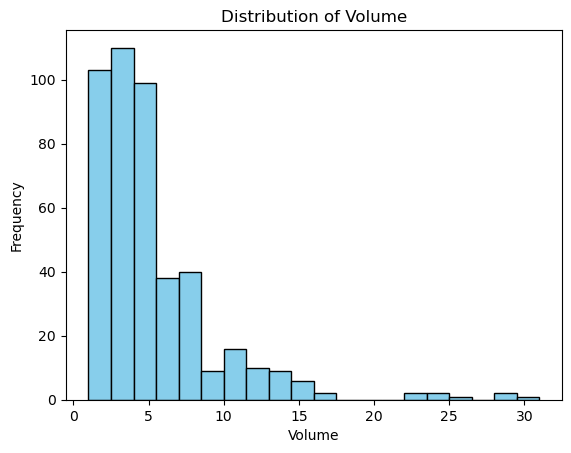

In [131]:
plt.hist(data['Volume'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()

Analysis: The histogram of Volume shows that the majority of transactions involve a small number of units sold, with a right-skewed distribution. There are a few transactions with a significantly higher volume compared to the rest, indicating the presence of outliers.

Avg Price

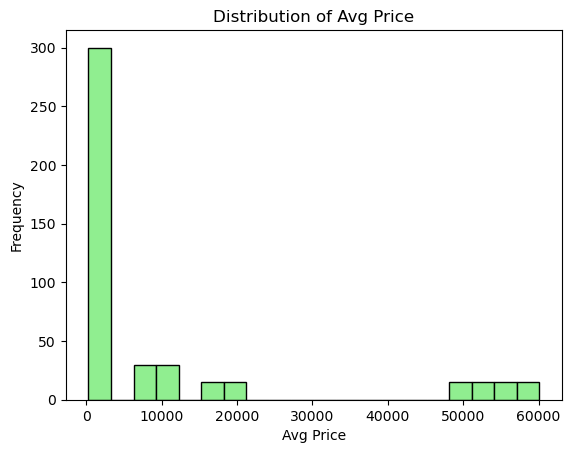

In [132]:
plt.hist(data['Avg Price'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Avg Price')
plt.xlabel('Avg Price')
plt.ylabel('Frequency')
plt.show()

Analysis: The histogram of Avg Price indicates that most products are sold at lower prices, with a right-skewed distribution. There are also some products sold at higher prices, contributing to the tail of the distribution.

Total Sales Value

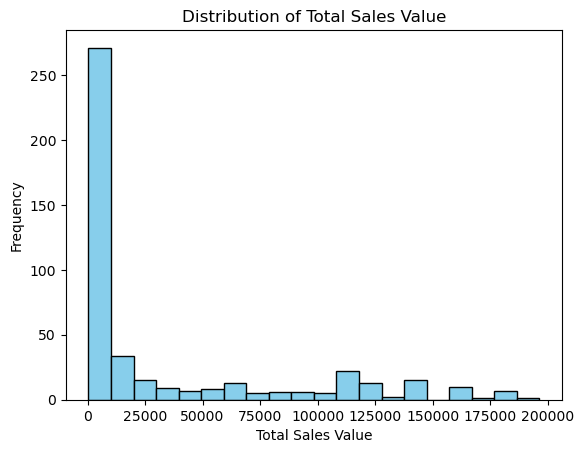

In [133]:
plt.hist(data['Total Sales Value'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Sales Value')
plt.xlabel('Total Sales Value')
plt.ylabel('Frequency')
plt.show()

Analysis: The histogram of Total Sales Value shows a wide range of sales values, with a right-skewed distribution. Most transactions have lower sales values, while there are a few transactions with significantly higher sales values

Boxplots

Volume

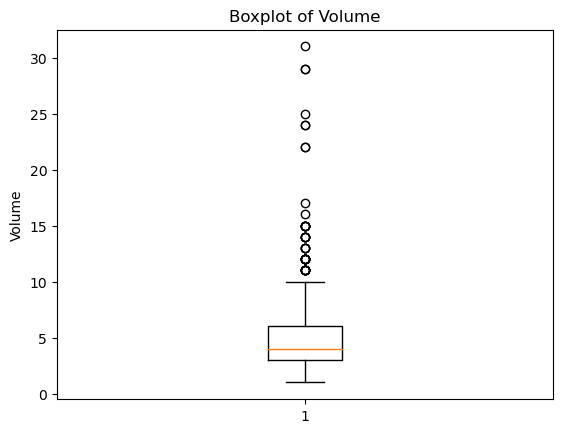

In [134]:
plt.boxplot(data['Volume'])
plt.title('Boxplot of Volume')
plt.ylabel('Volume')
plt.show()

Analysis: The boxplot of Volume reveals the presence of outliers, with the majority of transactions having a smaller volume of units sold. The median volume is lower, indicating that half of the transactions involve selling fewer units.

Avg Price


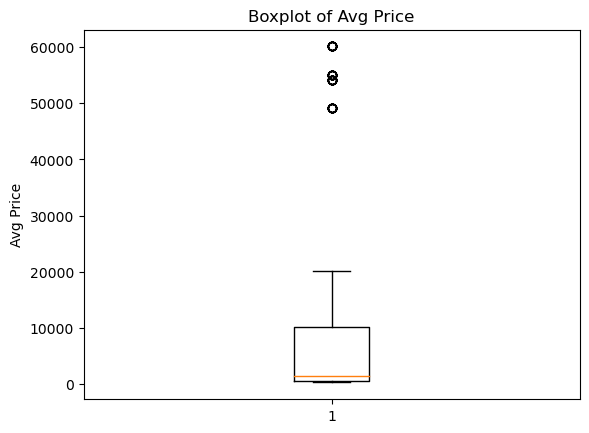

In [135]:
plt.boxplot(data['Avg Price'])
plt.title('Boxplot of Avg Price')
plt.ylabel('Avg Price')
plt.show()

Analysis: The boxplot of Avg Price shows the distribution of product prices, with a few outliers on the higher end. Most products are sold at lower prices, with the median price falling in the lower range.

Total Sales Value

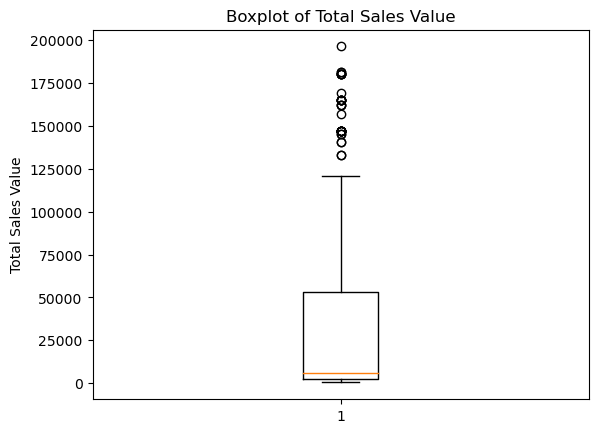

In [136]:
plt.boxplot(data['Total Sales Value'])
plt.title('Boxplot of Total Sales Value')
plt.ylabel('Total Sales Value')
plt.show()

Analysis: The boxplot of Total Sales Value illustrates the spread of sales values, with some transactions having significantly higher values compared to others. There are a few outliers representing high sales values.

Bar Chart Analysis for Categorical Column

City

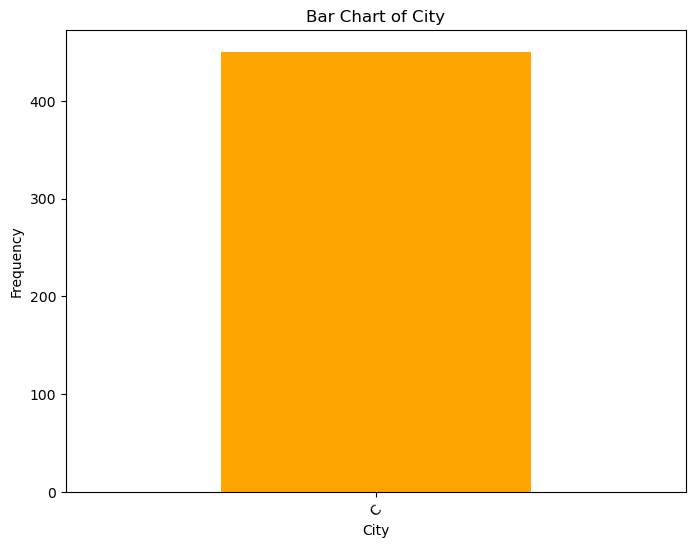

In [137]:
plt.figure(figsize=(8, 6))
data['City'].value_counts().plot(kind='bar',color='orange')
plt.title('Bar Chart of City')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Analysis for City

The bar chart of City displays the frequency of transactions in each city. It indicates that most transactions occur in City C, followed by other cities. This insight can be useful for understanding the distribution of sales across different locations.

In [138]:
data['City'].value_counts() #how many values in column city

City
C    450
Name: count, dtype: int64

In [139]:
 data['City'].nunique()  #how many values in column city

1

BRAND

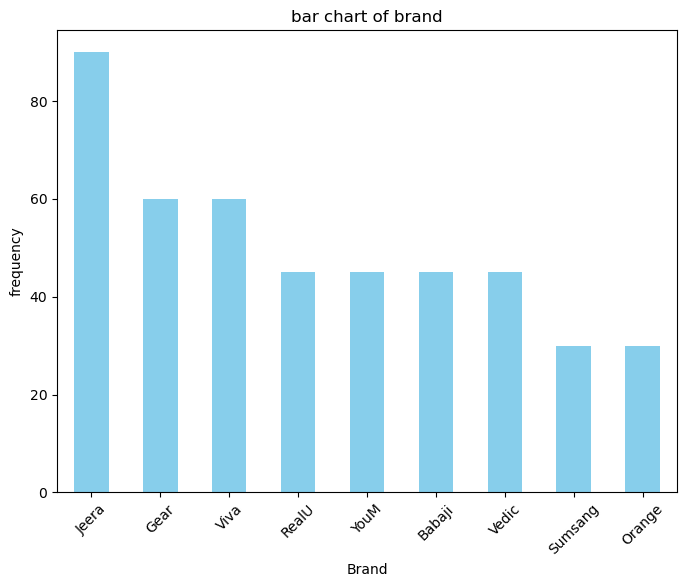

In [140]:
plt.figure(figsize=(8,6))
data['Brand'].value_counts().plot(kind='bar',color='skyblue')
plt.title('bar chart of brand')
plt.xlabel('Brand')
plt.ylabel('frequency')
plt.xticks(rotation=45)
plt.show()

Analysis for Brand

The bar chart of Brand shows the frequency of transactions for each brand. It reveals that RealU is the most popular brand, followed by other brands. This information can be valuable for analyzing the market share of different brands.

# Standardization of Numerical Variables

In [141]:
#Standardization, also known as Z-score normalization
# Z Score = (x − x̅ )/σ

Before Standardization

In [142]:
print("Summary Statistics Before Standardization:")
print(data.describe())

Summary Statistics Before Standardization:
           Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
count  450.000000    450.000000         450.000000         450.000000   
mean     5.066667  10453.433333       33812.835556          15.155242   
std      4.231602  18079.904840       50535.074173           4.220602   
min      1.000000    290.000000         400.000000           5.007822   
25%      3.000000    465.000000        2700.000000          13.965063   
50%      4.000000   1450.000000        5700.000000          16.577766   
75%      6.000000  10100.000000       53200.000000          18.114718   
max     31.000000  60100.000000      196400.000000          19.992407   

       Discount Amount  Net Sales Value  
count       450.000000       450.000000  
mean       3346.499424     30466.336131  
std        4509.902963     46358.656624  
min          69.177942       326.974801  
25%         460.459304      2202.208645  
50%         988.933733      4677.788059  
75%  

Standardization

In [143]:
from sklearn.preprocessing import StandardScaler

In [144]:
# select numerical column to Standardization
numerical_columns = data.select_dtypes(include=np.number).columns
numerical_columns

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [145]:
scaler = StandardScaler()
scaler

StandardScaler()

In [150]:
data_standardizedd = data.copy()
data_standardizedd[numerical_columns]  = scaler.fit_transform(data[numerical_columns])
data_standardizedd[numerical_columns]



,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595
...,...,...,...,...,...,...
445,-0.725512,-0.506840,-0.618334,0.076009,-0.653541,-0.610461
446,0.220808,-0.434857,-0.360801,0.451097,-0.152191,-0.378500
447,-0.725512,-0.490229,-0.606448,0.903793,-0.608140,-0.601921
448,-0.488932,-0.473617,-0.556923,0.388474,-0.530379,-0.555499


After Standardization

In [155]:
print("Summary Statistics after Standardization:")
data_standardizedd.describe()

Summary Statistics after Standardization:


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02
mean,6.118562e-17,3.157968e-17,1.578984e-17,-3.552714e-17,-5.526444e-17,1.973730e-17
std,1.001113e+00,1.001113e+00,1.001113e+00,1.001113e+00,1.001113e+00,1.001113e+00
min,-9.620925e-01,-5.627654e-01,-6.619170e-01,-2.406935e+00,-7.275032e-01,-6.508581e-01
25%,-4.889322e-01,-5.530754e-01,-6.163534e-01,-2.823066e-01,-6.406462e-01,-6.103625e-01
50%,-2.523521e-01,-4.985344e-01,-5.569226e-01,3.374180e-01,-5.233349e-01,-5.569025e-01
75%,2.208081e-01,-1.957016e-02,3.840648e-01,7.019781e-01,4.373018e-01,3.753543e-01
max,6.135311e+00,2.749009e+00,3.220894e+00,1.147360e+00,4.970494e+00,3.218536e+00


# Displaying comparison of data distributions before and after standardization

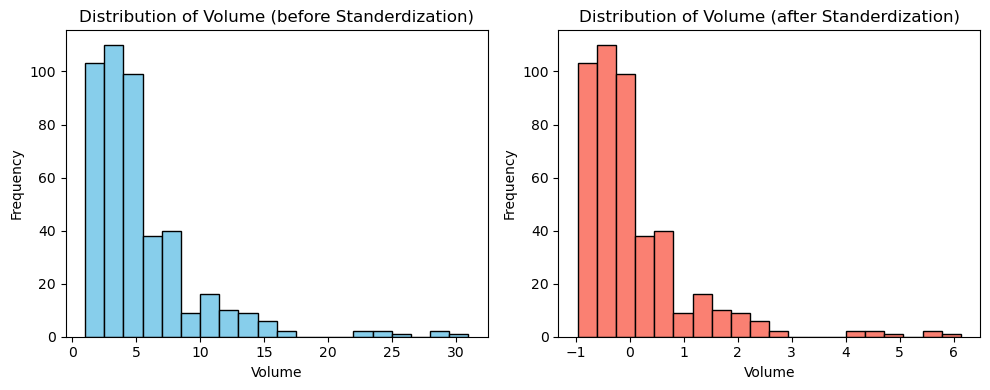

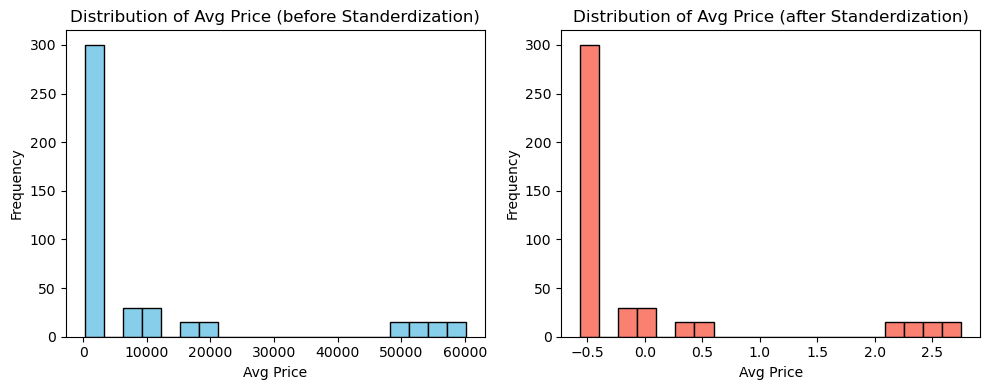

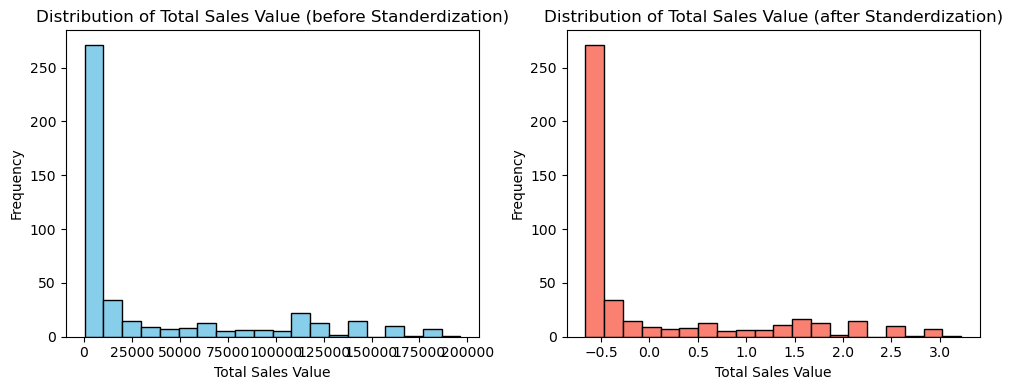

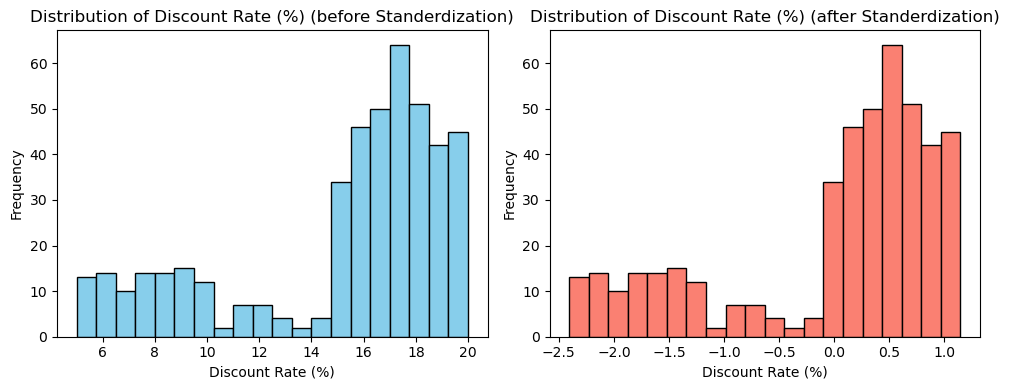

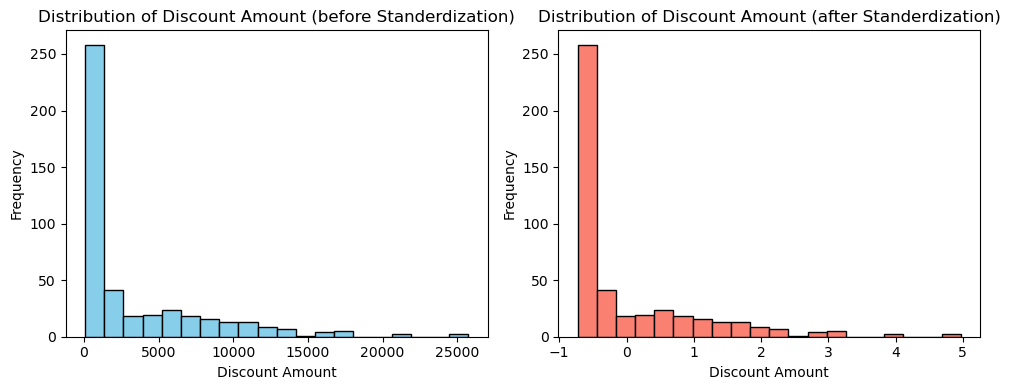

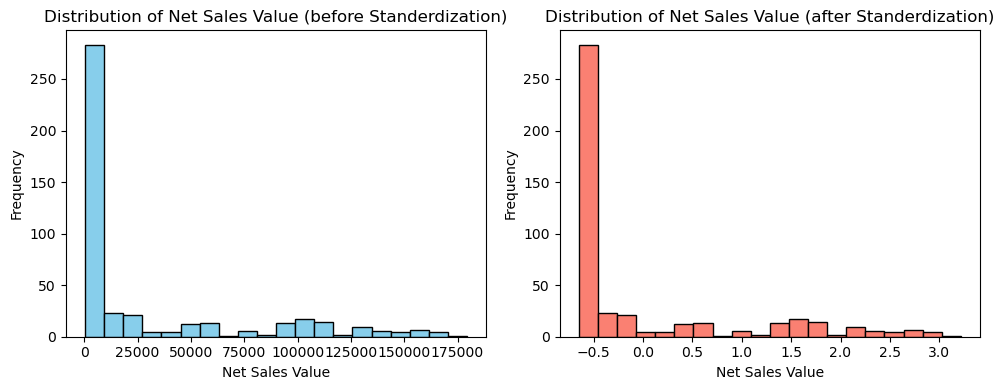

In [158]:
for column in numerical_columns:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.hist(data[column],bins=20,color='skyblue',edgecolor='black')
    plt.title(f'Distribution of {column} (before Standerdization)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.subplot(1, 2, 2)
    plt.hist(data_standardizedd[column],bins=20,color='salmon',edgecolor='black')
    plt.title(f'Distribution of {column} (after Standerdization)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    
    
    
    

# Conversion of Categorical Data into Dummy Variables

In [159]:
data_encoded = pd.get_dummies(data)

In [160]:
data_encoded 

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,10100,101000,11.560498,11676.102961,89323.897039,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910157,102042.089843,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.925298,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.053770,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
446,6,2600,15600,17.057027,2660.896242,12939.103758,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
447,2,1600,3200,18.965550,606.897606,2593.102394,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
448,3,1900,5700,16.793014,957.201826,4742.798174,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# conclusion

# Key Findings from Descriptive Analytics and Data Visualizations

 Numerical columns:
  
1 - The mean Volume of sales is 5.07 units, with a median of 4 units, indicating a slightly right-skewed distribution.
2 - Total Sales Value has a mean of 33812.84 and a median of 5700, suggesting a right-skewed distribution with some transactions having considerably higher sales values.
3 - Discount Amount and Net Sales Value exhibit similar patterns, with a wide range of values and a right-skewed distribution Data Visulation:
    

 Data Visulation:

1 - Histograms and boxplots revealed the distribution and presence of outliers in numerical variables.
        
2 - Bar charts for categorical columns illustrated the frequency of transactions in each category, providing insights into the distribution of sales across different cities and brands.    

# Reflection on the Importance of Data Preprocessing Steps
Standardization:

Standardizing numerical variables ensures that they are on the same scale, improving the performance of analytical models.
By scaling the data to have a mean of 0 and a standard deviation of 1, standardization facilitates accurate pattern recognition in the data.
One-Hot Encoding:

One-hot encoding transforms categorical variables into a numerical format suitable for machine learning algorithms.
This process enables models to interpret categorical data effectively and make accurate predictions based on the transformed dataset.
In conclusion, data preprocessing steps like standardization and one-hot encoding are essential for ensuring the quality and usability of the dataset in data analysis and machine learning tasks. These steps enable us to extract meaningful insights, build accurate models, and make informed decisions based on the data.

